# BatApp paper classificator
## Author: Łukasz Popek

### Description

A notebook created to train and compare classifiers to assess whether an article is concerned with the emergence of new types of viruses among bat species. The classification is based on text analysis of abstracts of scientific articles. Based on this, two classifiers were trained: one based on logistic regression and one based on a support vector machine. The dataset is single-class in nature, with up to checked articles based on the Chinese DBatVir database (http://www.mgc.ac.cn/DBatVir/), and articles randomly downloaded based on keywords implicitly adopted as a negative class. Then, in an iterative process, the trained classifier was used to separate positive cases from the negative class. 


### Download of datasets

In [1]:
!gdown 1l2I83mzL3yzK8OrZIJD25wQq4gl3V1xz

Downloading...
From: https://drive.google.com/uc?id=1l2I83mzL3yzK8OrZIJD25wQq4gl3V1xz
To: /content/positive_cls_data_papers.csv
100% 1.02M/1.02M [00:00<00:00, 99.4MB/s]


In [2]:
!gdown 1caqs8yWhOyEz5NkAns6zReY3G-N_O-19

Downloading...
From: https://drive.google.com/uc?id=1caqs8yWhOyEz5NkAns6zReY3G-N_O-19
To: /content/unknown_cls_data_papers.csv
100% 880k/880k [00:00<00:00, 101MB/s]


### Initial Preprocessing

In [3]:
import pandas as pd

In [4]:
df_true = pd.read_csv('positive_cls_data_papers.csv')
df_false = pd.read_csv('unknown_cls_data_papers.csv')

val = [1] * len(df_true.index)
df_true['value'] = val


df_false = df_false.drop(df_false.index[0])
val_neg = [0] * len(df_false.index)
df_false['value'] = val_neg


frames = [df_true, df_false]
dataset_frame = pd.concat(frames)

dataset_frame.drop(columns=['Unnamed: 0', 'affiliations', 'authors', 'journal', 'date', 'keywords', 'title'], inplace=True)
# dataset_frame.reset_index(inplace=True)
dataset_frame

,abstract,url,value
0,Several lineage B betacoronaviruses termed sev...,https://pubmed.ncbi.nlm.nih.gov/26433221,1
1,"Bats carry a variety of viruses, and some of t...",https://pubmed.ncbi.nlm.nih.gov/28589292,1
2,"Coronavirus, an important zoonotic disease, ra...",https://pubmed.ncbi.nlm.nih.gov/34696471,1
3,"Here, we report a novel bat adenovirus strain ...",https://pubmed.ncbi.nlm.nih.gov/35112204,1
4,Bats are an important reservoir of several zoo...,https://pubmed.ncbi.nlm.nih.gov/34697920,1
...,...,...,...
480,Viral infections have detrimental impacts on n...,https://pubmed.ncbi.nlm.nih.gov/32240762,0
481,Recent outbreaks of severe acute respiratory s...,https://pubmed.ncbi.nlm.nih.gov/30712865,0
482,The emergence of SARS-CoV-2 has resulted in >9...,https://pubmed.ncbi.nlm.nih.gov/32155444,0
483,A variety of coronaviruses (CoVs) have infecte...,https://pubmed.ncbi.nlm.nih.gov/33137344,0


### Key words extraction

In [5]:
list_keywords = list(df_true['keywords'])
list_keywords = [e[:-1] for e in list_keywords if e != 'NO_KEYWORDS']
all_keywords = []
for keywords in list_keywords:
  splited_list = keywords.split('; ')
  all_keywords.extend(splited_list)
all_keywords = [word for word in all_keywords if len(word.split(' ')) < 3]
len(all_keywords)

950

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

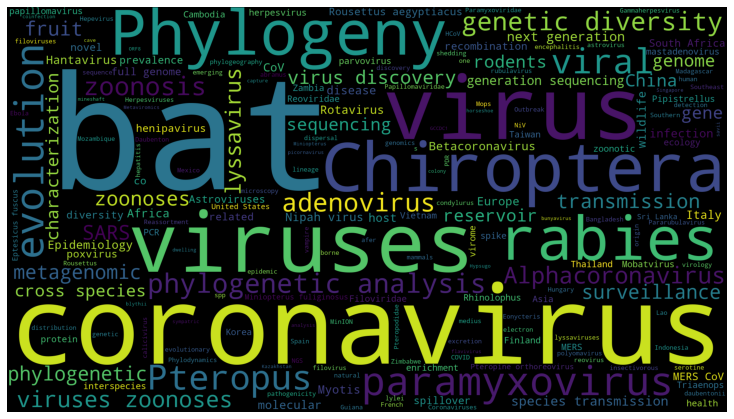

In [7]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join([word for word in all_keywords]))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Natural langugage preprocessing



In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [13]:
dataset_frame = dataset_frame[dataset_frame.abstract != 'NO_ABSTRACT'].reset_index(drop=True)
dataset_frame

,abstract,url,value
0,Several lineage B betacoronaviruses termed sev...,https://pubmed.ncbi.nlm.nih.gov/26433221,1
1,"Bats carry a variety of viruses, and some of t...",https://pubmed.ncbi.nlm.nih.gov/28589292,1
2,"Coronavirus, an important zoonotic disease, ra...",https://pubmed.ncbi.nlm.nih.gov/34696471,1
3,"Here, we report a novel bat adenovirus strain ...",https://pubmed.ncbi.nlm.nih.gov/35112204,1
4,Bats are an important reservoir of several zoo...,https://pubmed.ncbi.nlm.nih.gov/34697920,1
...,...,...,...
901,Viral infections have detrimental impacts on n...,https://pubmed.ncbi.nlm.nih.gov/32240762,0
902,Recent outbreaks of severe acute respiratory s...,https://pubmed.ncbi.nlm.nih.gov/30712865,0
903,The emergence of SARS-CoV-2 has resulted in >9...,https://pubmed.ncbi.nlm.nih.gov/32155444,0
904,A variety of coronaviruses (CoVs) have infecte...,https://pubmed.ncbi.nlm.nih.gov/33137344,0


In [14]:
dataset_frame.drop_duplicates(inplace=True)

In [15]:
dataset_frame['abstract'] = dataset_frame['abstract'].apply(remove_tags)

In [16]:
dataset_frame['abstract'] = dataset_frame['abstract'].apply(lambda x:x.replace("\\", "")) 

In [17]:
dataset_frame['abstract'] = dataset_frame['abstract'].apply(lambda x:x.replace("\'", "")) 

In [18]:
dataset_frame['abstract'] = dataset_frame['abstract'].apply(lambda x:x.replace("\n ", " "))
dataset_frame['abstract'] = dataset_frame['abstract'].apply(lambda x:x.replace("                    ", " "))

In [19]:
dataset_frame['abstract'][905]

'Background: The ongoing outbreak of the recently emerged novel coronavirus (2019-nCoV) poses a challenge for public health laboratories as virus isolates are unavailable while there is growing evidence that the outbreak is more widespread than initially thought, and international spread through travellers does already occur. Aim: We aimed to develop and deploy robust diagnostic methodology for use in public health laboratory settings without having virus material available. Methods: Here we present a validated diagnostic workflow for 2019-nCoV, its design relying on close genetic relatedness of 2019-nCoV with SARS coronavirus, making use of synthetic nucleic acid technology. Results: The workflow reliably detects 2019-nCoV, and further discriminates 2019-nCoV from SARS-CoV. Through coordination between academic and public laboratories, we confirmed assay exclusivity based on 297 original clinical specimens containing a full spectrum of human respiratory viruses. Control material is ma

In [20]:
dataset_frame['abstract'] = dataset_frame['abstract'].apply(lambda x:x.lower())

In [21]:
dataset_frame['abstract'] = dataset_frame['abstract'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [22]:
dataset_frame['abstract'] = dataset_frame['abstract'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x.split()]).apply(lambda x:" ".join(x))

In [23]:
dataset_frame['abstract'] = dataset_frame['abstract'].apply(lambda x: tokenizer.tokenize(x))

In [24]:
str(dataset_frame['abstract'][905])

"['background', 'ongoing', 'outbreak', 'recently', 'emerged', 'novel', 'coronavirus', '2019', 'ncov', 'pose', 'challenge', 'public', 'health', 'laboratory', 'virus', 'isolates', 'unavailable', 'growing', 'evidence', 'outbreak', 'widespread', 'initially', 'thought', 'international', 'spread', 'traveller', 'already', 'occur', 'aim', 'aimed', 'develop', 'deploy', 'robust', 'diagnostic', 'methodology', 'use', 'public', 'health', 'laboratory', 'setting', 'without', 'virus', 'material', 'available', 'methods', 'present', 'validated', 'diagnostic', 'workflow', '2019', 'ncov', 'design', 'relying', 'close', 'genetic', 'relatedness', '2019', 'ncov', 'sars', 'coronavirus', 'making', 'use', 'synthetic', 'nucleic', 'acid', 'technology', 'results', 'workflow', 'reliably', 'detects', '2019', 'ncov', 'discriminates', '2019', 'ncov', 'sars', 'cov', 'coordination', 'academic', 'public', 'laboratories', 'confirmed', 'assay', 'exclusivity', 'based', '297', 'original', 'clinical', 'specimen', 'containing',

### Logistic Regression

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

In [26]:
train, test= train_test_split(dataset_frame, test_size=0.1, random_state=42)
X_train, y_train = train['abstract'], train['value']
X_test, y_test = test['abstract'], test['value']

In [27]:
X_test

867    [hepatitis, delta, virus, hdv, hepatitis, b, v...
439    [latin, america, hematophagous, bat, main, res...
342    [genome, bat, adenovirus, 2, sequenced, analyz...
735    [recent, emergence, novel, pathogenic, sars, c...
784    [obesity, characterized, state, chronic, infla...
                             ...                        
259    [rift, valley, fever, virus, rvfv, phlebovirus...
757    [genetic, redundancy, defined, many, different...
110    [background, nipah, virus, niv, first, emerged...
672    [groundbreaking, study, brain, evolution, acro...
231    [marburg, virus, family, filoviridae, cause, s...
Name: abstract, Length: 91, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf = TfidfVectorizer() 
X_train_tfidf = tfidf.fit_transform(" ".join(word_list) for word_list in X_train)
X_test_tfidf = tfidf.transform(" ".join(word_list) for word_list in X_test)

In [29]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [30]:
pred_lr = lr.predict(X_test_tfidf)
proba_lr = lr.decision_function(X_test_tfidf)
score_lr = accuracy_score(y_test, pred_lr)
print("Classification Report:\n")
print(classification_report(pred_lr,y_test))

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.96      0.92      0.94        53

    accuracy                           0.93        91
   macro avg       0.93      0.94      0.93        91
weighted avg       0.94      0.93      0.93        91



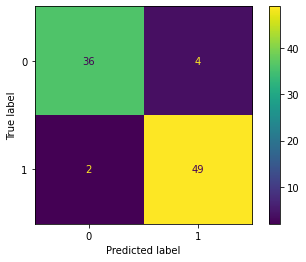

In [31]:
cm = confusion_matrix(y_test, pred_lr)
cm_display = ConfusionMatrixDisplay(cm).plot()

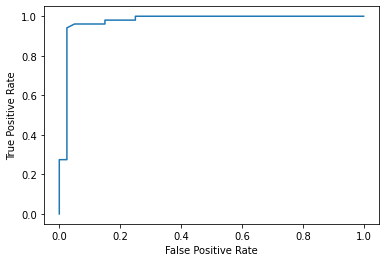

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = lr.decision_function(X_test_tfidf)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


In [33]:
for index, row in dataset_frame.iterrows():
    # print(row['abstract'])
    if row['value'] == 0:
      cls_vect = tfidf.transform([str(row['abstract'])])
      if lr.predict(cls_vect):
        dataset_frame.at[index, 'value'] = 1
        print(row['abstract'])

['detected', '3', 'lyssavirus', 'insectivorous', 'bat', 'sampled', 'south', 'africa', '2003', '2018', 'used', 'phylogenetic', 'analysis', 'identify', 'duvenhage', 'lyssavirus', 'potentially', 'new', 'lyssavirus', 'provisionally', 'named', 'matlo', 'bat', 'lyssavirus', 'related', 'west', 'caucasian', 'bat', 'virus', 'new', 'detection', 'highlight', 'much', 'lyssavirus', 'remains', 'unknown']
['last', 'two', 'decades', 'several', 'high', 'impact', 'zoonotic', 'disease', 'outbreak', 'linked', 'bat', 'borne', 'viruses', 'include', 'sars', 'coronavirus', 'hendra', 'virus', 'nipah', 'virus', 'addition', 'suspected', 'ebolaviruses', 'mers', 'coronavirus', 'also', 'linked', 'bats', 'increasingly', 'accepted', 'bat', 'potential', 'reservoir', 'large', 'number', 'known', 'unknown', 'viruses', 'many', 'could', 'spillover', 'animal', 'human', 'populations', 'however', 'knowledge', 'basic', 'bat', 'biology', 'immunology', 'limited', 'little', 'understanding', 'major', 'factor', 'contributing', 'ris

In [34]:
tfidf = TfidfVectorizer() 
X_train_tfidf = tfidf.fit_transform(" ".join(word_list) for word_list in X_train)
X_test_tfidf = tfidf.transform(" ".join(word_list) for word_list in X_test)

In [35]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
lr_iterated = LogisticRegression()
lr_iterated.fit(X_train_tfidf, y_train)

LogisticRegression()

In [36]:
pred_lr = lr_iterated.predict(X_test_tfidf)
proba_lr = lr_iterated.decision_function(X_test_tfidf)
score_lr = accuracy_score(y_test, pred_lr)
print("Classification Report:\n")
print(classification_report(pred_lr,y_test))

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.96      0.92      0.94        53

    accuracy                           0.93        91
   macro avg       0.93      0.94      0.93        91
weighted avg       0.94      0.93      0.93        91



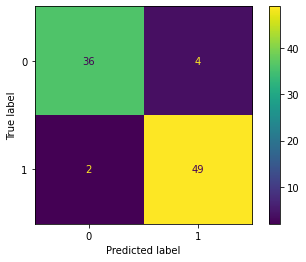

In [37]:
cm = confusion_matrix(y_test, pred_lr)
cm_display = ConfusionMatrixDisplay(cm).plot()

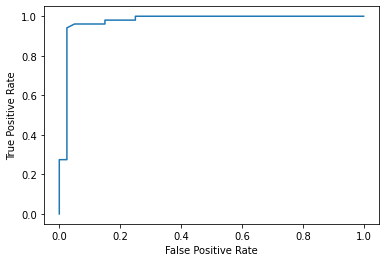

In [38]:

y_score = lr_iterated.decision_function(X_test_tfidf)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


In [39]:
for index, row in dataset_frame.iterrows():
    # print(row['abstract'])
    if row['value'] == 0:
      cls_vect = tfidf.transform([str(row['abstract'])])
      if lr_iterated.predict(cls_vect):
        dataset_frame.at[index, 'value'] = 1
        print(row['abstract'])

###SVM

In [40]:
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l2', loss='hinge')
svm.fit(X_train_tfidf, y_train)


LinearSVC(loss='hinge')

In [41]:
pred_svm = svm.predict(X_test_tfidf)
proba_svm = svm.decision_function(X_test_tfidf)
score_svm = accuracy_score(y_test, pred_svm)
print("Classification Report:\n")
print(classification_report(pred_svm, y_test))

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.96      0.96      0.96        51

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



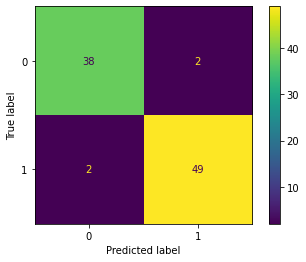

In [42]:
cm = confusion_matrix(y_test, pred_svm)
cm_display = ConfusionMatrixDisplay(cm).plot()

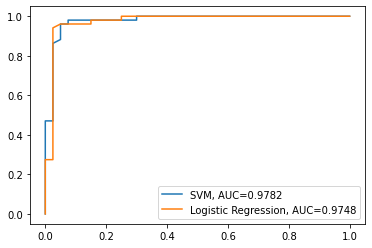

In [43]:
import matplotlib.pyplot as plt
#set up plotting area
plt.figure(0).clf()

y_score_svm = svm.decision_function(X_test_tfidf)
y_score_lr = lr_iterated.decision_function(X_test_tfidf)

#fit logistic regression model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score_svm)
auc = round(roc_auc_score(y_test, y_score_svm), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve

fpr, tpr, _ = roc_curve(y_test, y_score_lr)
auc = round(roc_auc_score(y_test, y_score_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#add legend
plt.legend()

### Save models 

In [44]:
from joblib import dump, load
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import joblib as j
j.__version__

'1.2.0'

In [45]:
dump(svm, '/content/drive/MyDrive/UW ICM Master/Data/cls/svm.joblib')
dump(lr_iterated, '/content/drive/MyDrive/UW ICM Master/Data/cls/lr.joblib')
dump(tfidf, '/content/drive/MyDrive/UW ICM Master/Data/cls/vectoriser.pkl')

['/content/drive/MyDrive/UW ICM Master/Data/cls/vectoriser.pkl']